### 내가 풀지 않은 문제 중 나와 비슷한 레벨의 타 사용자가 푼 문제 추천 (사용자마다 다르게 보여야 함)
- 사용자 이름(아이디)을 입력하면 문제가 추천됨
- 사용자 클러스터링을 통해 사용자에게 군집을 부여하고 나는 풀지 않았지만 같은 군집 내 타 사용자들이 많이 푼 문제를 추천
- 문제
    - **사용자마다 화면에 다르게 보여야 함 -> 웹 페이지 구성을 어떻게 해야하나?**
    - **사용자 데이터가 아래 df와 같이 저장되어야 한다는 단점이 있음**

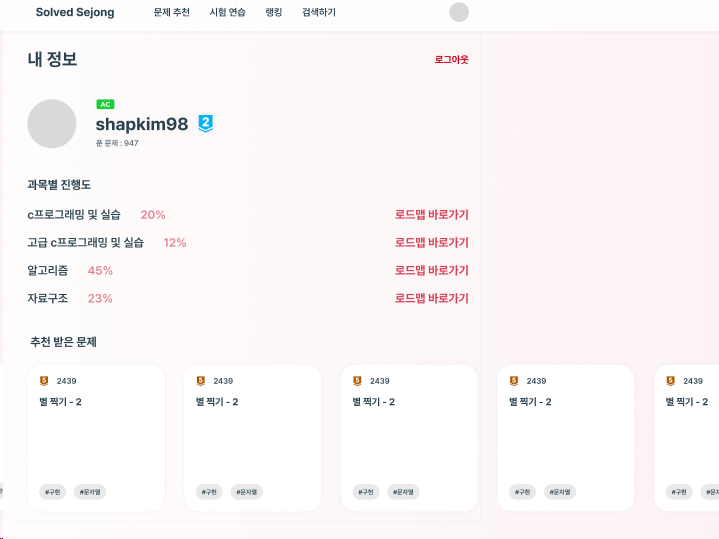

In [1]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

def problem_recommendation(df, idx, name):
    test = df[df['이름'] == name]
    
    # 조건에 맞는 행 추출
    level = []
    ran = 2
    k = int(test['레벨'].iloc[0])

    for i in range(k-ran, k+ran + 1):
        level.append(i)

    # test['레벨']에 level이 포함된 행 추출
    filtered_rows = df[df['레벨'].isin(level)]
    
    # 최적의 군집 수 찾기
    kmeans = KMeans(random_state=42)
    KEV = KElbowVisualizer(kmeans, k=20, n_init="auto")
    KEV.fit(filtered_rows[['레벨', 'unrated', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'ruby']])
    plt.close()
        
    n_clusters = KEV.elbow_value_
    
    # 찾은 최적의 군집 수로 군집화
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(filtered_rows[['레벨', 'unrated', 'bronze', 'silver', 'gold', 'platinum', 'diamond', 'ruby']])
    
    # 군집화 결과를 Cluster 컬럼에 넣음
    filtered_rows['Cluster'] = kmeans.labels_
    
    # test 사용자와 같은 군집에 속한 사용자 추출
    total = filtered_rows[filtered_rows['Cluster'] == filtered_rows.iloc[idx]['Cluster']].drop(index=idx)
    
    total['푼 문제 번호'] = total['푼 문제 번호'].str.replace('[', '')
    total['푼 문제 번호'] = total['푼 문제 번호'].str.replace(']', '')

    test['푼 문제 번호'] = test['푼 문제 번호'].str.replace('[', '')
    test['푼 문제 번호'] = test['푼 문제 번호'].str.replace(']', '')
    
    # 문제 번호를 쉼표로 구분하여 나누고, 빈도수를 계산하기
    test_counts = test['푼 문제 번호'].str.split(',').explode().apply(int).to_list()
    
    # test 사용자가 풀지 않은 문제 추출
    problem_counts = total[~total['푼 문제 번호'].isin(test_counts)]

    # 문제 번호를 쉼표로 구분하여 나누고, 빈도수를 계산하기
    problem_counts = total['푼 문제 번호'].str.split(',').explode().apply(int).value_counts()
    
    return problem_counts[:5].index.to_list()

# 사용자 데이터 불러오기
df = pd.read_csv('fake_user.csv')
# 문제 데이터 불러오기
q = pd.read_csv('df_최종_최종.csv')

name = input('이름을 입력하세요: ')
idx = df[df['이름'] == name].index[0]

question = problem_recommendation(df, idx, name)
# 문제 번호 출력
print(question)

# 문제 번호와 제목 데이터프레임 형식으로 출력
q[q['문제번호'].isin(question)][['문제번호', '제목']]

이름을 입력하세요: 김서준
[24264, 1511, 14559, 28447, 4049]


,문제번호,제목
503,1511,숫자 만들기
2309,4049,행렬의 텐서곱
4783,14559,Protocol
7455,24264,알고리즘 수업 - 알고리즘의 수행 시간 3
8856,28447,마라탕 재료 고르기


In [2]:
# 이름 예시
df = pd.read_csv('fake_user.csv')
df

,이름,레벨,푼 문제 번호,푼 문제의 레벨,unrated,bronze,silver,gold,platinum,diamond,ruby
0,김서준,2,"[24838, 9327, 14176, 25605, 9254, 28143, 15483...","[12, 15, 23, 15, 0, 18, 13, 9, 22, 21, 20, 0, ...",3.0,4.0,9.0,11.0,15.0,8.0,0.0
1,이수진,4,"[15480, 25564, 12859, 13877, 17615, 23045, 238...","[19, 21, 15, 4, 10, 19, 13, 9, 3, 3, 2, 19, 13...",6.0,10.0,6.0,11.0,12.0,5.0,0.0
2,박지영,6,"[16890, 4447, 20917, 13509, 27944, 11668, 1061...","[15, 4, 12, 20, 16, 17, 20, 10, 16, 13, 14, 14...",3.0,6.0,8.0,14.0,13.0,6.0,0.0
3,서지후,8,"[14855, 17256, 12782, 17971, 8901, 23052, 2653...","[12, 1, 7, 21, 11, 27, 12, 5, 16, 7, 16, 7, 20...",4.0,6.0,10.0,12.0,9.0,5.0,4.0
4,김병철,7,"[17399, 14590, 11942, 23833, 9660, 24892, 5052...","[19, 15, 1, 17, 11, 15, 12, 22, 12, 22, 14, 14...",3.0,13.0,7.0,13.0,10.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,고보람,10,"[25353, 10991, 20930, 1776, 2690, 14561, 25967...","[26, 3, 16, 0, 12, 4, 15, 8, 4, 7, 23, 16, 24,...",1.0,7.0,8.0,12.0,14.0,7.0,1.0
996,김진우,7,"[21559, 4159, 14250, 2889, 3058, 19946, 2093, ...","[16, 8, 16, 22, 3, 4, 12, 9, 17, 1, 7, 22, 11,...",0.0,5.0,9.0,17.0,11.0,7.0,1.0
997,박은서,3,"[24542, 1707, 14429, 1515, 16706, 13949, 14282...","[10, 12, 5, 8, 0, 23, 18, 12, 26, 15, 20, 3, 1...",2.0,5.0,6.0,16.0,14.0,6.0,1.0
998,박현지,8,"[1629, 12097, 3186, 13315, 1567, 23975, 28468,...","[10, 0, 9, 16, 0, 16, 17, 2, 12, 12, 12, 5, 19...",5.0,4.0,8.0,14.0,12.0,4.0,3.0


플라스크로 API 서버 만들기
- API endpoint에 어떤 값이 오는지 설정 
- Postman 활용